In [1]:
%pip install -q python-dotenv langchain-openai


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI

query = "인프런에는 어떤 강의가 있나요?"

llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

llm.invoke(query)

AIMessage(content='인프런은 다양한 주제의 온라인 강의를 제공하는 플랫폼으로, 주로 IT, 프로그래밍, 데이터 사이언스, 디자인, 마케팅 등 여러 분야의 강의를 찾을 수 있습니다. 예를 들어, 다음과 같은 강의들이 있습니다:\n\n1. **프로그래밍 언어**: Python, Java, JavaScript, C++, Ruby 등\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등\n3. **모바일 개발**: Android, iOS, Flutter 등\n4. **데이터 사이언스**: 데이터 분석, 머신러닝, 인공지능, R, SQL 등\n5. **디자인**: UI/UX 디자인, 포토샵, 일러스트레이터 등\n6. **클라우드**: AWS, Azure, Google Cloud 등\n7. **마케팅**: 디지털 마케팅, SEO, 소셜 미디어 마케팅 등\n\n각 강의는 강사에 따라 다르며, 초급부터 고급 과정까지 다양하게 제공됩니다. 인프런 웹사이트를 방문하면 현재 제공되는 강의 목록과 상세 정보를 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 248, 'prompt_tokens': 18, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', '

# Langgraph : State, Node, Edge, Conditional Edge

State : 현재 에이전트의 상태
Node : 에이전트가 수행하는 작업 (함수)
query -> retrieve -> generate 이런것들이 노드에 해당 됨 
Edge : 노드들의 관계 (실선 : 무조건 실행)
Conditional Edge : (점선 : 옵셔널) 

In [4]:
%pip install -q langgraph 


[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]

AnyMessage : SystemMessage, HumanMessage, AiMessage 

In [6]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)


In [7]:
def generate(state: AgentState) -> AgentState:
    messages = state["messages"]
    ai_message = llm.invoke(messages)
    return {'messages': ai_message}

In [8]:
graph_builder.add_node("generate", generate)

In [9]:
from langgraph.graph import START, END

graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)


In [10]:
graph = graph_builder.compile()

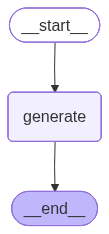

In [11]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': AIMessage(content='인프런은 다양한 주제의 온라인 강의를 제공하는 플랫폼으로, 주로 IT, 프로그래밍, 데이터 분석, 디자인, 마케팅 등 여러 분야의 강의를 찾을 수 있습니다. 예를 들어, 다음과 같은 강의들이 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, Ruby 등 다양한 프로그래밍 언어에 대한 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등을 포함한 웹 개발 관련 강의.\n3. **데이터 분석**: 데이터 시각화, 머신러닝, 데이터베이스(SQL) 등 데이터 관련 강의.\n4. **모바일 개발**: iOS, Android 앱 개발 관련 강의.\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵, 일러스트레이터 강의.\n6. **마케팅**: 디지털 마케팅, SEO, 소셜 미디어 마케팅 관련 강의.\n\n각 강의는 강사에 따라 다르며, 초급부터 고급 과정까지 다양하게 제공됩니다. 인프런 웹사이트를 방문하면 현재 제공되는 강의 목록과 상세 정보를 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 256, 'prompt_tokens': 18, 'total_tokens': 274, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_f